In [1]:
from neurodsp.sim.combined import sim_combined
from neurodsp.spectral import compute_spectrum
from fooof import FOOOF
from fooof.plts.fm import plot_fm
from fooof.plts import plot_spectra
from fooof.plts.aperiodic import plot_aperiodic_fits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/var/folders/5j/h9q625yn13vfynsjc2bymdy00000gn/T/ipykernel_74110/2329530154.py:3: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [29]:
n_seconds = 3
fs = 1000

# Define the components of the combined signal to simulate
components = {'sim_powerlaw' : {'exponent': -2},
              'sim_bursty_oscillation' : {'freq' : 12.5, 'burst_params': {'enter_burst': 0.1, 'leave_burst': 0.9}}}
component_variances = [1, 0.25]

# Simulate a bursty oscillation combined with aperiodic activity
sig = sim_combined(n_seconds, fs, components, component_variances)

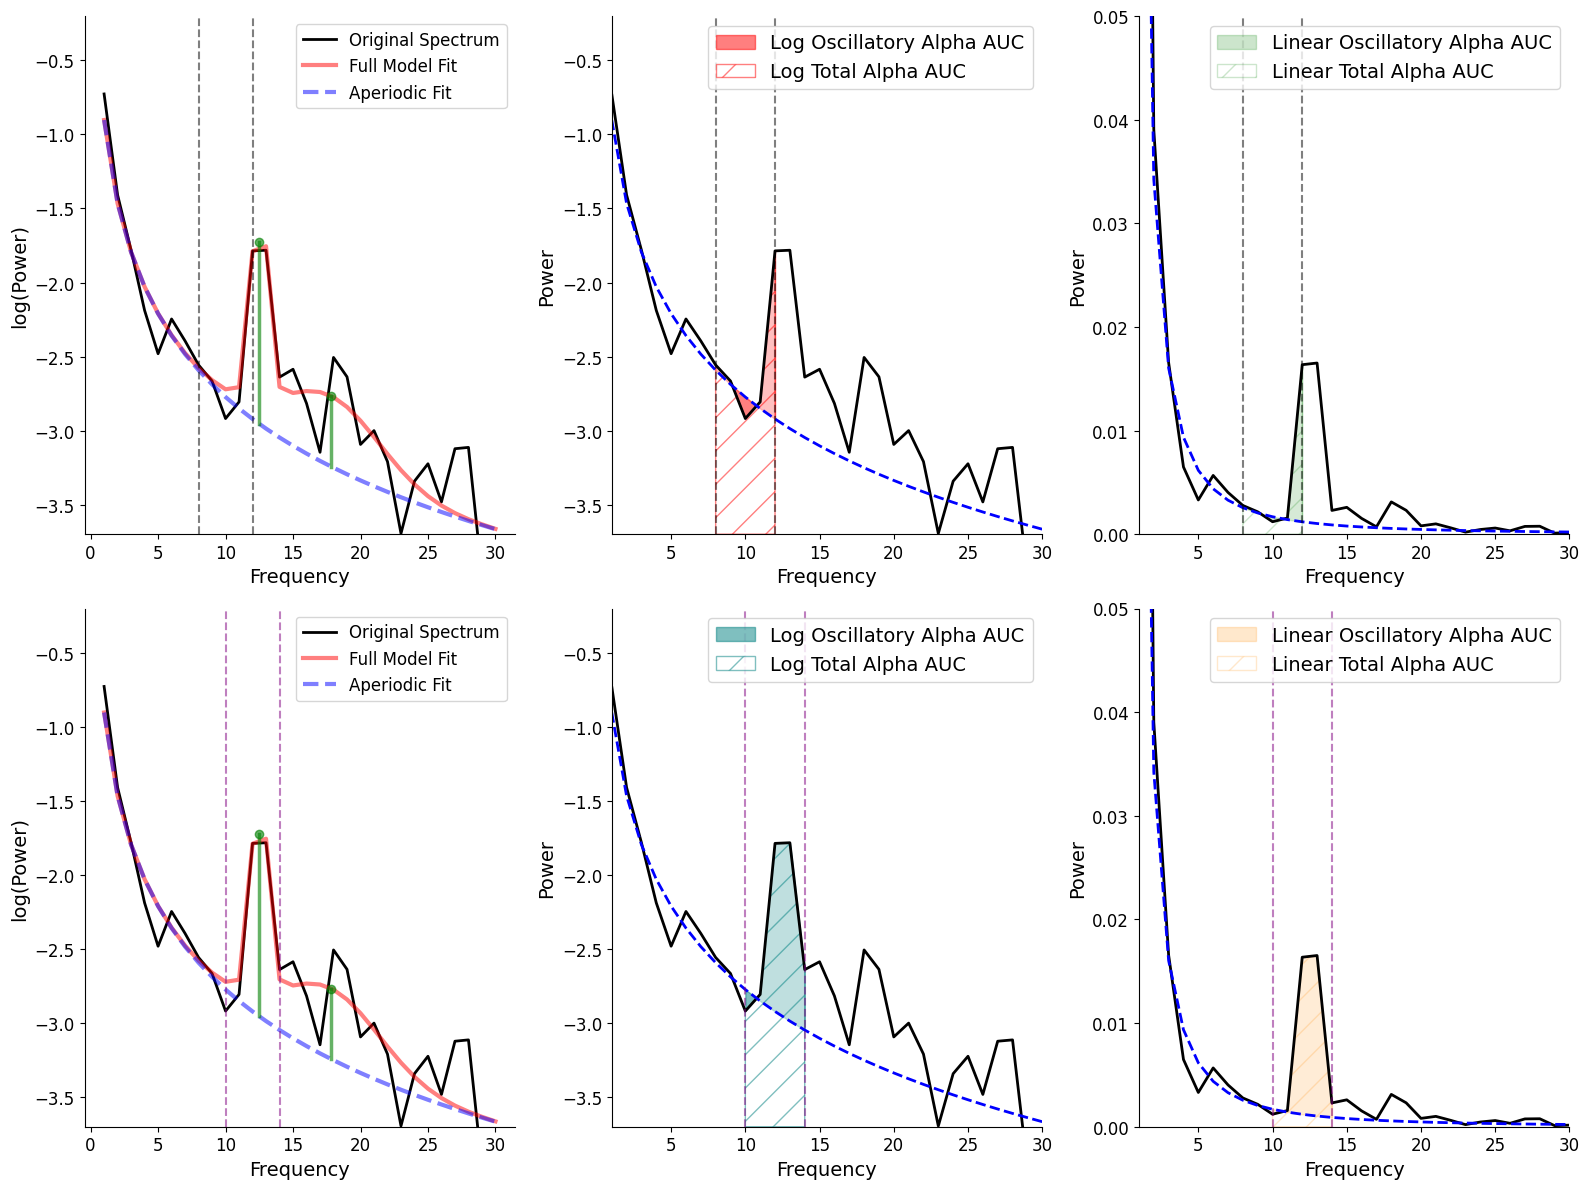

In [30]:
freqs, powers = compute_spectrum(sig, fs)

fm = FOOOF(verbose=False, max_n_peaks=3)
fm.fit(freqs, powers, freq_range=[1, 30])

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# No FOOOF peak found
plot_fm(fm, ax=axes[0, 0], plot_peaks='dot')
axes[0, 0].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 0].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[0, 1], c='k')
plot_spectra(freqs[1:31], fm._ap_fit, freq_range=[1, 30], ax=axes[0, 1], c='blue', ls='--')
axes[0, 1].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 1].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 1].set_ylim([-3.7, -0.2])
axes[0, 1].fill_between(freqs[8:13], fm._ap_fit[7:12], y2=np.log10(powers[8:13]), color='r', alpha=0.5, label='Log Oscillatory Alpha AUC')
axes[0, 1].fill_between(freqs[8:13], np.repeat(-3.7, 5), y2=np.log10(powers[8:13]), hatch='/', facecolor='w', edgecolor='r', alpha=0.5, label='Log Total Alpha AUC')
axes[0, 1].legend(loc='upper right', fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[0, 2], c='k')
plot_spectra(freqs[1:31], 10 ** fm._ap_fit, freq_range=[1, 30], ax=axes[0, 2], c='blue', ls='--')
axes[0, 2].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 2].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 2].set_ylim([0, 0.05])
axes[0, 2].fill_between(freqs[8:13], 10 ** fm._ap_fit[7:12], y2=powers[8:13], color='g', alpha=0.2, label='Linear Oscillatory Alpha AUC')
axes[0, 2].fill_between(freqs[8:13], np.repeat(0, 5), y2=powers[8:13], hatch='/', facecolor='w', edgecolor='g', alpha=0.2, label='Linear Total Alpha AUC')
axes[0, 2].legend(loc='upper right', fontsize=14)

# No FOOOF peak found
plot_fm(fm, ax=axes[1, 0], plot_peaks='dot')
axes[1, 0].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 0].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[1, 1], c='k')
plot_spectra(freqs[1:31], fm._ap_fit, freq_range=[1, 30], ax=axes[1, 1], c='blue', ls='--')
axes[1, 1].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 1].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 1].set_ylim([-3.7, -0.2])
axes[1, 1].fill_between(freqs[10:15], fm._ap_fit[9:14], y2=np.log10(powers[10:15]), color='teal', alpha=0.5, label='Log Oscillatory Alpha AUC')
axes[1, 1].fill_between(freqs[10:15], np.repeat(-3.7, 5), y2=np.log10(powers[10:15]), hatch='/', facecolor='w', edgecolor='teal', alpha=0.5, label='Log Total Alpha AUC')
axes[1, 1].legend(loc='upper right', fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[1, 2], c='k')
plot_spectra(freqs[1:31], 10 ** fm._ap_fit, freq_range=[1, 30], ax=axes[1, 2], c='blue', ls='--')
axes[1, 2].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 2].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 2].set_ylim([0, 0.05])
axes[1, 2].fill_between(freqs[10:15], 10 ** fm._ap_fit[9:14], y2=powers[10:15], color='darkorange', alpha=0.2, label='Linear Oscillatory Alpha AUC')
axes[1, 2].fill_between(freqs[10:15], np.repeat(0, 5), y2=powers[10:15], hatch='/', facecolor='w', edgecolor='darkorange', alpha=0.2, label='Linear Total Alpha AUC')
axes[1, 2].legend(loc='upper right', fontsize=14)

for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        ax.grid(False)
        sns.despine(ax=ax)
